In [ ]:
pip install scikit-learn
pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 95.3 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import os
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing import image
import cv2

In [ ]:
# Chargement des images
def load_images_from_folder(folder, label, target_size=(224, 224)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, target_size)
            images.append(img)
            labels.append(label)
    return images, labels

# Charger les données
def load_data():
    # Chemins vers vos sous-dossiers
    pop_folder = "data/Pop"
    jazz_folder = "data/Jazz"
    death_metal_folder = "data/Death_Metal"

    pop_images, pop_labels = load_images_from_folder(pop_folder, 0)  # 0 pour Pop
    jazz_images, jazz_labels = load_images_from_folder(jazz_folder, 1)  # 1 pour Jazz
    death_metal_images, death_metal_labels = load_images_from_folder(death_metal_folder, 2)  # 2 pour Death Metal

    # Combiner les données
    images = np.array(pop_images + jazz_images + death_metal_images)
    labels = np.array(pop_labels + jazz_labels + death_metal_labels)

    return images, labels

# Prétraitement des images : normalisation et vectorisation
def preprocess_images(images):
    # Normalisation : Diviser par 255 pour que les pixels soient dans [0, 1]
    images = images.astype('float32') / 255.0

    # Aplatir les images en vecteurs (224 x 224 x 3 -> 150528)
    images = images.reshape(images.shape[0], -1)
    
    # Application de PCA pour réduire la dimensionnalité (environ 500 dimensions pour un bon compromis)
    pca = PCA(n_components=500)
    images = pca.fit_transform(images)
    
    return images


In [7]:
# Charger les données
images, labels = load_data()

In [11]:
# Print the number of genre in all the labels

unique, counts = np.unique(labels, return_counts=True)
label_counts = dict(zip(unique, counts))
print(label_counts)

{np.int64(0): np.int64(948), np.int64(1): np.int64(943), np.int64(2): np.int64(889)}


In [12]:
# Diviser les données en training et test set
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [13]:
# Prétraiter les images
X_train = preprocess_images(X_train)
X_test = preprocess_images(X_test)

# Standardisation (important pour SVM et KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
def evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "KNN": KNeighborsClassifier(n_neighbors=60),
        "SVM": SVC(),
        "Logistic Regression": LogisticRegression(max_iter=1000)
    }

    for name, model in models.items():
        # Validation croisée
        print(f"Validation croisée pour {name} :")
        scores = cross_val_score(model, X_train, y_train, cv=5)
        print(f"Cross-validation accuracy: {scores.mean():.4f} ± {scores.std():.4f}")
        
        # Entraînement et évaluation du modèle
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name} Accuracy: {accuracy:.4f}")
        print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

In [18]:
# Evaluer les modèles
evaluate_models(X_train, X_test, y_train, y_test)

Validation croisée pour KNN :
Cross-validation accuracy: 0.3898 ± 0.0357
KNN Accuracy: 0.3417
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.82      0.48       187
           1       0.00      0.00      0.00       192
           2       0.35      0.21      0.26       177

    accuracy                           0.34       556
   macro avg       0.23      0.34      0.25       556
weighted avg       0.23      0.34      0.24       556

Validation croisée pour SVM :


/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Cross-validation accuracy: 0.4856 ± 0.0171
SVM Accuracy: 0.3993
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.35      0.40       187
           1       0.36      0.54      0.43       192
           2       0.39      0.31      0.34       177

    accuracy                           0.40       556
   macro avg       0.41      0.40      0.39       556
weighted avg       0.41      0.40      0.39       556

Validation croisée pour Logistic Regression :
Cross-validation accuracy: 0.4429 ± 0.0161
Logistic Regression Accuracy: 0.3669
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.38      0.37       187
           1       0.37      0.35      0.36       192
           2       0.36      0.37      0.37       177

    accuracy                           0.37       556
   macro avg       0.37      0.37      0.37       556
weighted avg       0.37      0.37      0.37       556



Neural Network handmade :

In [ ]:
pip install tensorflow[and-cuda]

In [ ]:
pip install matplotlib

In [2]:
pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 61.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


Found 2226 images belonging to 3 classes.
Found 554 images belonging to 3 classes.

Training model with 1 hidden layers...
Epoch 1/10


I0000 00:00:1735912302.465859    9072 service.cc:148] XLA service 0x7fa9900090d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1735912302.465917    9072 service.cc:156]   StreamExecutor device (0): NVIDIA A2, Compute Capability 8.6
2025-01-03 13:51:42.495379: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1735912302.579446    9072 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/70 ━━━━━━━━━━━━━━━━━━━━ 3:31 3s/step - accuracy: 0.5000 - loss: 1.2182

I0000 00:00:1735912304.391081    9072 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 0.3433 - loss: 36.7795

/opt/conda/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


70/70 ━━━━━━━━━━━━━━━━━━━━ 34s 450ms/step - accuracy: 0.3433 - loss: 36.4797 - val_accuracy: 0.4278 - val_loss: 1.0984
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 29s 408ms/step - accuracy: 0.3773 - loss: 1.2086 - val_accuracy: 0.3809 - val_loss: 1.1306
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 29s 407ms/step - accuracy: 0.4060 - loss: 1.1843 - val_accuracy: 0.3285 - val_loss: 1.9543
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 29s 414ms/step - accuracy: 0.3973 - loss: 1.3712 - val_accuracy: 0.4368 - val_loss: 1.1046
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 28s 398ms/step - accuracy: 0.4360 - loss: 1.1072 - val_accuracy: 0.3484 - val_loss: 1.2891
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 29s 413ms/step - accuracy: 0.3737 - loss: 1.2876 - val_accuracy: 0.4639 - val_loss: 1.0711
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 29s 411ms/step - accuracy: 0.3853 - loss: 1.1968 - val_accuracy: 0.3195 - val_loss: 1.1018
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 28s 406ms/step - accuracy: 0.3140 - loss: 1.1020 - val_accuracy: 0.31

2025-01-03 13:56:37.520371: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_298', 68 bytes spill stores, 72 bytes spill loads



50/70 ━━━━━━━━━━━━━━━━━━━━ 6s 325ms/step - accuracy: 0.3390 - loss: 25.7365

2025-01-03 13:56:56.267603: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_298', 32 bytes spill stores, 32 bytes spill loads



70/70 ━━━━━━━━━━━━━━━━━━━━ 36s 468ms/step - accuracy: 0.3423 - loss: 22.0739 - val_accuracy: 0.4079 - val_loss: 2.2057
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 29s 409ms/step - accuracy: 0.3851 - loss: 1.9167 - val_accuracy: 0.4116 - val_loss: 1.1975
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 29s 408ms/step - accuracy: 0.3842 - loss: 1.5074 - val_accuracy: 0.4458 - val_loss: 1.1058
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 27s 379ms/step - accuracy: 0.4101 - loss: 1.2795 - val_accuracy: 0.3375 - val_loss: 2.5764
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 29s 408ms/step - accuracy: 0.4082 - loss: 1.3389 - val_accuracy: 0.4007 - val_loss: 1.2075
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 28s 400ms/step - accuracy: 0.4084 - loss: 1.2387 - val_accuracy: 0.4368 - val_loss: 1.2262
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 27s 381ms/step - accuracy: 0.3838 - loss: 1.2106 - val_accuracy: 0.4152 - val_loss: 1.2307
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 29s 408ms/step - accuracy: 0.4055 - loss: 1.2331 - val_accuracy: 0.32

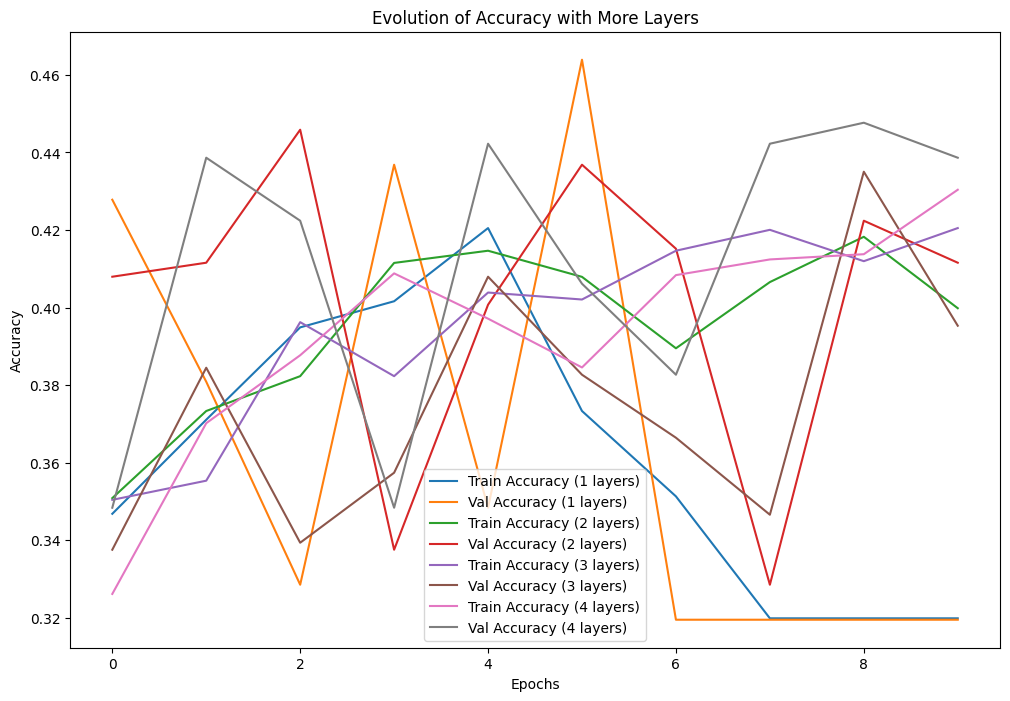

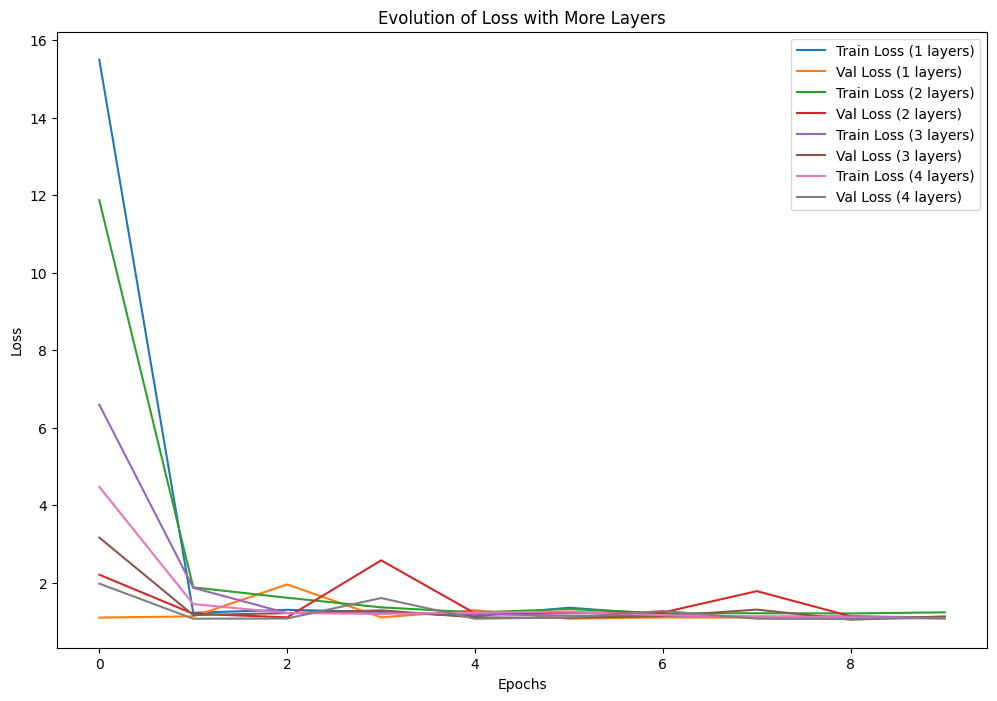

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# 1. Data preprocessing
data_dir = "data"

train_datagen = ImageDataGenerator(
    rescale=1.0/255,        # Normalisation des pixels entre 0 et 1
    validation_split=0.2,   # Fraction pour validation
    horizontal_flip=True,   # Flip horizontal
    rotation_range=20       # Légère rotation
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# 2. Function building a model with a personalized number of layers

def build_model(num_hidden_layers):
    model = models.Sequential()
    model.add(layers.Input(shape=(224, 224, 3)))
    model.add(layers.Flatten())

    for _ in range(num_hidden_layers):
        model.add(layers.Dense(128, activation='relu'))

    model.add(layers.Dense(3, activation='softmax'))  # 3 classes (pop, jazz, death metal)
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# 3. Training 4 different models to compare their accuracy
layer_counts = [1, 2, 3, 4]
history_per_layer = {}

for num_layers in layer_counts:
    print(f"\nTraining model with {num_layers} hidden layers...")
    model = build_model(num_layers)
    history = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator
    )
    history_per_layer[num_layers] = history

# 4. Plotting the results
plt.figure(figsize=(12, 8))

# Precision
for num_layers, history in history_per_layer.items():
    plt.plot(history.history['accuracy'], label=f'Train Accuracy ({num_layers} layers)')
    plt.plot(history.history['val_accuracy'], label=f'Val Accuracy ({num_layers} layers)')

plt.title('Evolution of Accuracy with More Layers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.figure(figsize=(12, 8))
for num_layers, history in history_per_layer.items():
    plt.plot(history.history['loss'], label=f'Train Loss ({num_layers} layers)')
    plt.plot(history.history['val_loss'], label=f'Val Loss ({num_layers} layers)')

plt.title('Evolution of Loss with More Layers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


CNN handmade

Found 2226 images belonging to 3 classes.
Found 554 images belonging to 3 classes.
Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 36s 466ms/step - accuracy: 0.4069 - loss: 1.3668 - val_accuracy: 0.3881 - val_loss: 1.0737
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 30s 429ms/step - accuracy: 0.4372 - loss: 1.0307 - val_accuracy: 0.4801 - val_loss: 1.0178
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 30s 429ms/step - accuracy: 0.4691 - loss: 1.0291 - val_accuracy: 0.4928 - val_loss: 1.0032
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 30s 428ms/step - accuracy: 0.4732 - loss: 1.0125 - val_accuracy: 0.5235 - val_loss: 0.9912
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 30s 431ms/step - accuracy: 0.4764 - loss: 1.0205 - val_accuracy: 0.5090 - val_loss: 0.9959
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 30s 429ms/step - accuracy: 0.5032 - loss: 0.9727 - val_accuracy: 0.5199 - val_loss: 0.9776
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 30s 429ms/step - accuracy: 0.4977 - loss: 0.9801 - val_accuracy: 0.4783 - val_loss: 1.0046
Epoch 8/20
70/

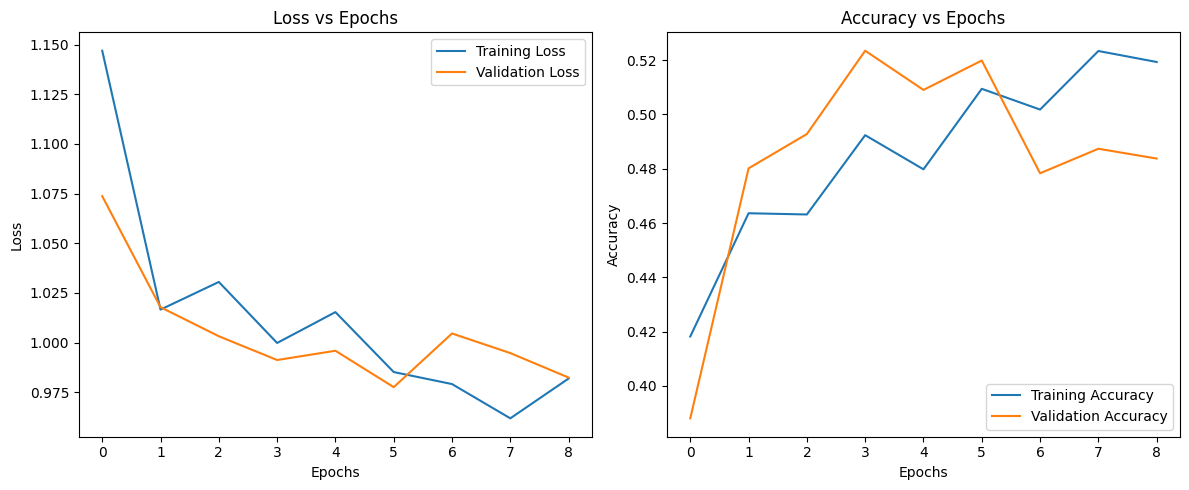

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Préparation des données
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% pour la validation
)

train_generator = train_datagen.flow_from_directory(
    'data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Création du modèle CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes (pop, jazz, death metal)
])

# Compilation du modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraînement avec Early Stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    callbacks=[callback]
)

# Visualisation des performances
plt.figure(figsize=(12, 5))

# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Courbe d'accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Fine tuning de ce modèle :

Saving the Model

In [7]:
model.save("cnn_music_genre.h5")  


In [8]:
model.save('cnn_music_genre.keras')